# 1 - Transformations

1. one very usefull transformation to take care of variable seasonality strength (different sizes of spikes on the chart) is the BOX=COX         transformation. 
2. It uses lambda to tune its strength: 1 for no change, and 0 for log transformation.
3. Lambda can be tuned automatically using Guerrero transformation, however if close to zero, the simple log transformation is preferrable due to very easy interpretability

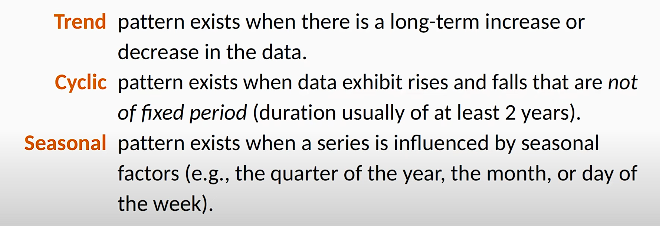

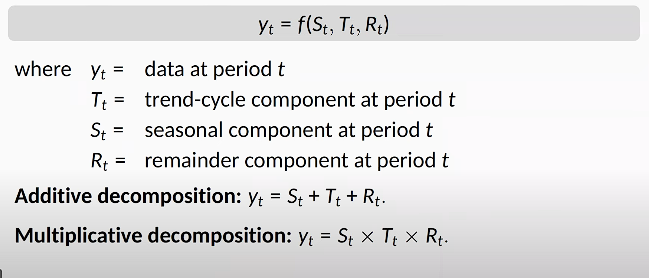

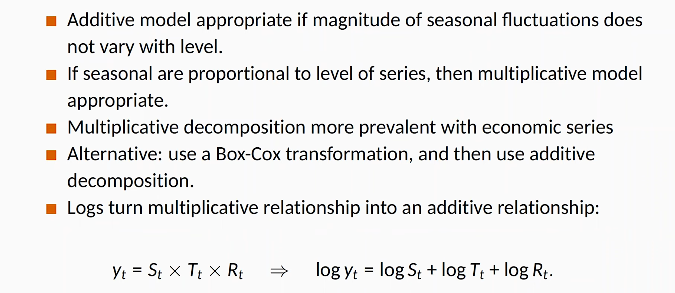

In [6]:
import pandas as pd

data_emp = pd.read_csv('../data-raw/US_employment/US_employment_fpp3_Monthly.txt', delimiter='\t')
data_emp

,observation_date,CEU0500000001_20191004,CEU0600000001_20191004,CEU0800000001_20191004,CEU1000000001_20191004,CEU1011330001_20191004,CEU1021000001_20191004,CEU1021100001_20191004,CEU1021200001_20191004,CEU1021210001_20191004,...,CEU9091100001_20191004,CEU9091912001_20191004,CEU9092000001_20191004,CEU9092161101_20191004,CEU9092200001_20191004,CEU9093000001_20191004,CEU9093161101_20191004,CEU9093200001_20191004,PAYNSA_20191004,TEMPHELPN_20191004
0,1939-01-01,25338,10806,14532,885,NaN,NaN,NaN,NaN,NaN,...,584.9,315.2,NaN,NaN,NaN,NaN,NaN,NaN,29296,NaN
1,1939-02-01,25447,10917,14530,882,NaN,NaN,NaN,NaN,NaN,...,596.3,313.1,NaN,NaN,NaN,NaN,NaN,NaN,29394,NaN
2,1939-03-01,25833,11150,14683,883,NaN,NaN,NaN,NaN,NaN,...,601.5,311.1,NaN,NaN,NaN,NaN,NaN,NaN,29804,NaN
3,1939-04-01,25801,10978,14823,614,NaN,NaN,NaN,NaN,NaN,...,605.8,313.1,NaN,NaN,NaN,NaN,NaN,NaN,29786,NaN
4,1939-05-01,26113,11143,14970,719,NaN,NaN,NaN,NaN,NaN,...,624.6,312.1,NaN,NaN,NaN,NaN,NaN,NaN,30145,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2019-05-01,128771,21108,107663,754,45.5,708.7,156.6,196.9,52.9,...,2206.4,607.4,5166.0,2464.4,2701.9,14859.0,8302.8,6555.8,151610,3009.5
965,2019-06-01,129800,21387,108413,762,47.7,713.9,160.5,199.1,53.0,...,2225.3,606.4,4906.0,2188.9,2717.0,14705.0,7941.7,6763.3,152243,3025.7
966,2019-07-01,129883,21438,108445,762,48.7,713.3,161.6,197.2,51.9,...,2228.2,607.3,4843.0,2123.8,2718.9,13607.0,6792.6,6814.7,151169,2965.9
967,2019-08-01,129930,21451,108479,760,50.3,710.1,164.0,197.1,53.1,...,2253.8,604.7,4923.0,2198.8,2724.0,13875.0,7130.0,6745.0,151587,3040.0


In [7]:
data_filtered = data_emp[['CEU0500000001_20191004','observation_date']].set_index('observation_date')
data_filtered = data_filtered[data_filtered.index >= '1990-01-01']
data_filtered.index = pd.DatetimeIndex(data_filtered.index).to_period('M')
data_filtered

,CEU0500000001_20191004
observation_date,
1990-01,89455
1990-02,89598
1990-03,90053
1990-04,90634
1990-05,91308
...,...
2019-05,128771
2019-06,129800
2019-07,129883


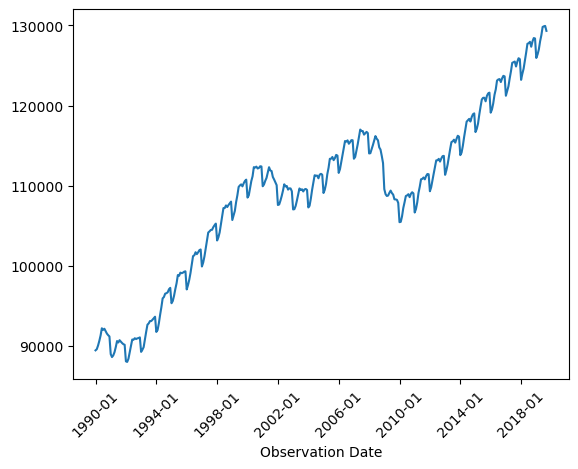

In [8]:
import matplotlib.pyplot as plt

plt.plot(data_filtered.index.astype(str), data_filtered['CEU0500000001_20191004'])
plt.xlabel('Observation Date')
plt.xticks(rotation=45)
plt.xticks(range(0, len(data_filtered.index), 48), data_filtered.index[::48])
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

date_range = pd.date_range(start=data_filtered.index[0].to_timestamp(), freq="ME", periods=357)
data_filtered_series = pd.Series(data_filtered['CEU0500000001_20191004'], index=date_range)
data_filtered.index = pd.to_datetime(data_filtered.index.to_timestamp())

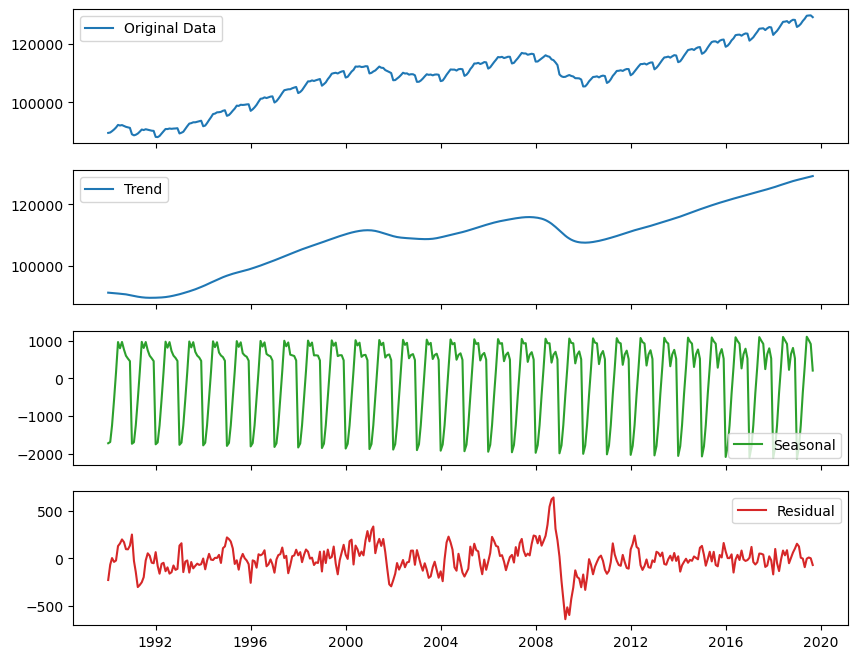

In [15]:
# Perform STL decomposition (equivalent to default STL in R)
stl = STL(data_filtered, seasonal=13)  # 12-point seasonal smoothing (adjust if needed)
result = stl.fit()

# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the results
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

axes[0].plot(data_filtered, label="Original Data")
axes[0].legend()

axes[1].plot(trend, label="Trend", color="tab:blue")
axes[1].legend()

axes[2].plot(seasonal, label="Seasonal", color="tab:green")
axes[2].legend()

axes[3].plot(residual, label="Residual", color="tab:red")
axes[3].legend()

plt.show()


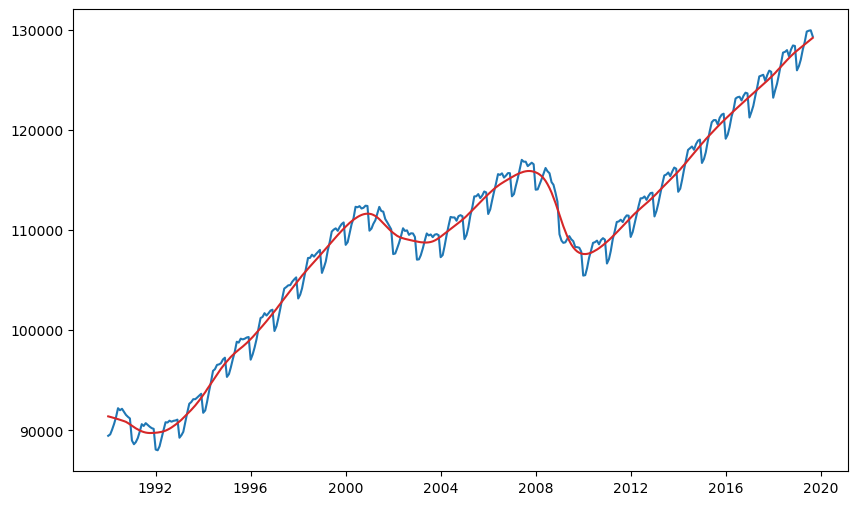

In [16]:
fig = plt.figure(figsize=(10, 6))
plt.plot(data_filtered, label="Original Data")
plt.plot(trend, label="Trend", color="tab:red")
plt.show()

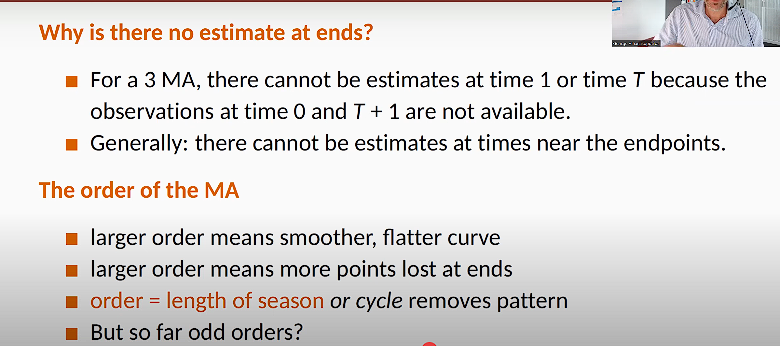

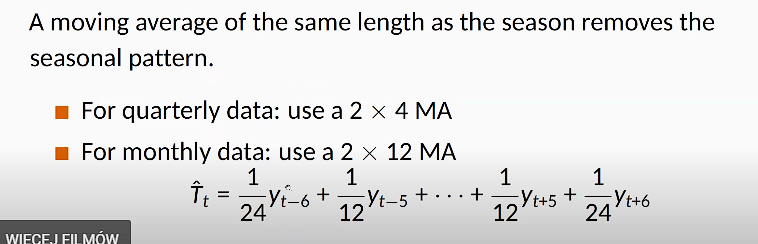

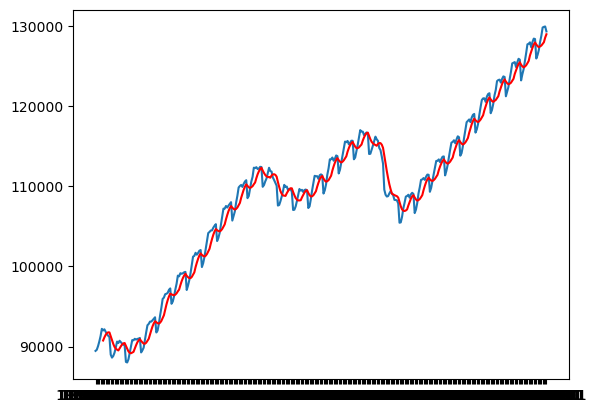

In [12]:
# moving average

data_filtered['MA'] = data_filtered['CEU0500000001_20191004'].rolling(window=12).mean() # 12-month moving average

plt.plot(data_filtered.index.astype(str), data_filtered['CEU0500000001_20191004'], label='Original')
plt.plot(data_filtered.index.astype(str), data_filtered['MA'], label='Moving Average', color='red')
plt.show()

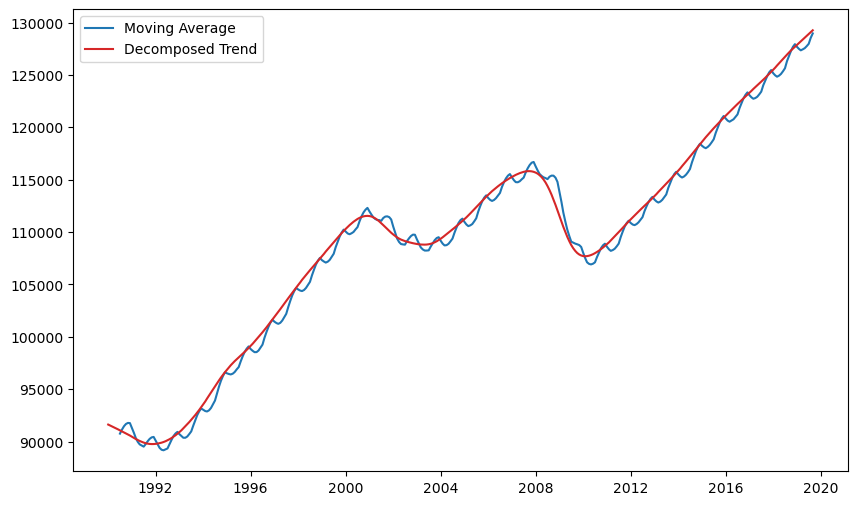

In [21]:
# lets compare to previously decomposed series

fig = plt.figure(figsize=(10, 6))
plt.plot(data_filtered['MA'], label="Moving Average", color="tab:blue")
plt.plot(trend, label="Decomposed Trend", color="tab:red")
plt.legend()
plt.show()

# Classical decomposition

While classical decomposition is still widely used, it is not recommended, as there are now several much better methods. Some of the problems with classical decomposition are summarised below.

The estimate of the trend-cycle is unavailable for the first few and last few observations. For example, if  m=12, there is no trend-cycle estimate for the first six or the last six observations. Consequently, there is also no estimate of the remainder component for the same time periods.
The trend-cycle estimate tends to over-smooth rapid rises and falls in the data.

Classical decomposition methods assume that the seasonal component repeats from year to year. For many series, this is a reasonable assumption, but for some longer series it is not. For example, electricity demand patterns have changed over time as air conditioning has become more widespread. In many locations, the seasonal usage pattern from several decades ago had its maximum demand in winter (due to heating), while the current seasonal pattern has its maximum demand in summer (due to air conditioning). Classical decomposition methods are unable to capture these seasonal changes over time.

Occasionally, the values of the time series in a small number of periods may be particularly unusual. For example, the monthly air passenger traffic may be affected by an industrial dispute, making the traffic during the dispute different from usual. The classical method is not robust to these kinds of unusual values.

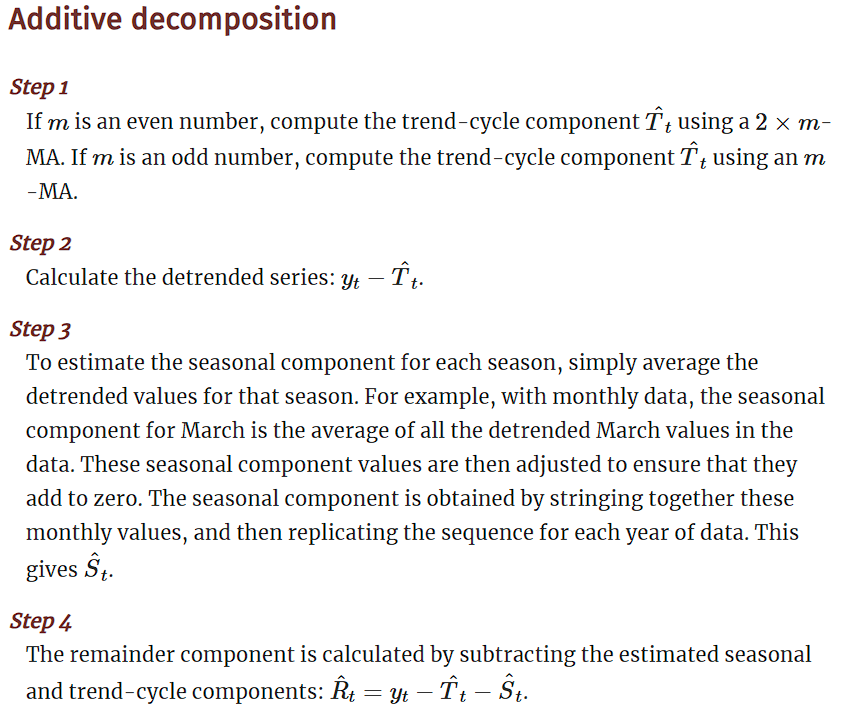

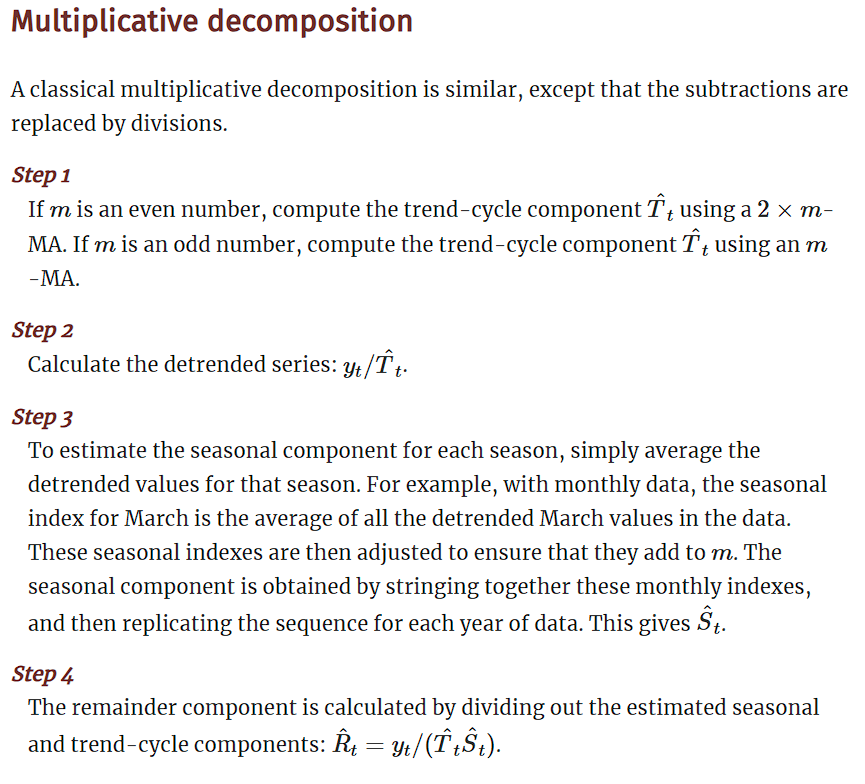

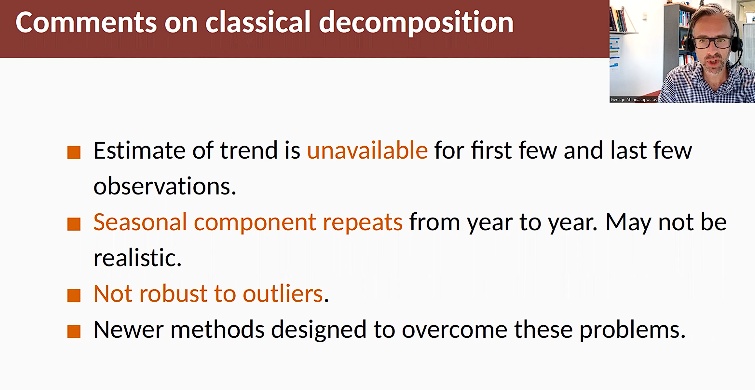